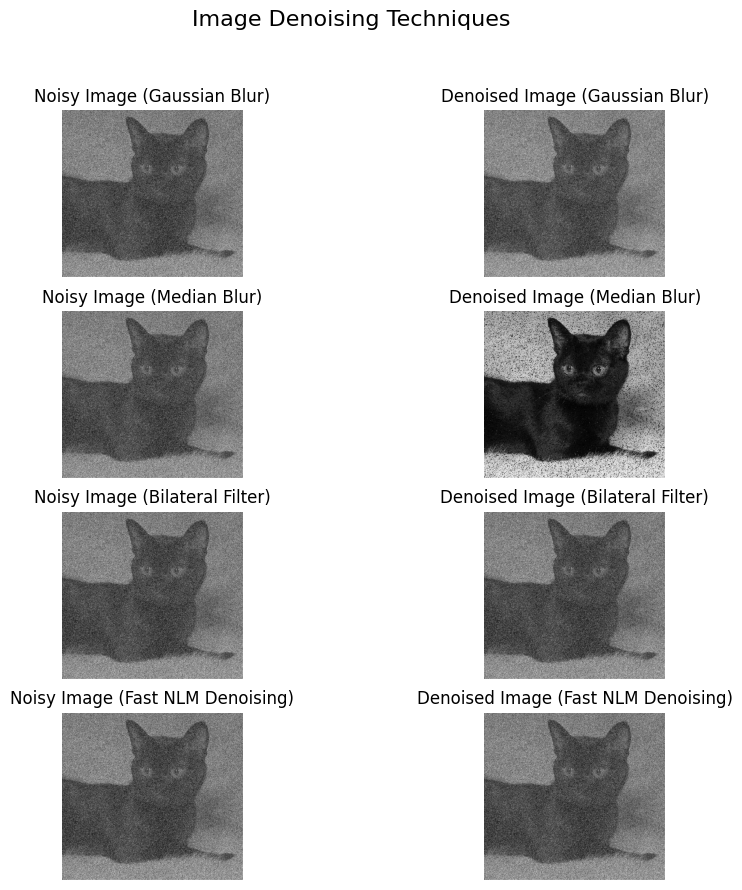

Denoising complete. All images saved in 'task1_Image_Denoising' folder.


In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Create output directory
output_dir = "task1_Image_Denoising"
os.makedirs(output_dir, exist_ok=True)

# Load the noisy image (grayscale)
image_path = '/kaggle/input/noisy-image-158/noisy_image.png'  
noisy_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if image was loaded successfully
if noisy_image is None:
    raise FileNotFoundError(f"Error: Image not found at '{image_path}'. Check the file path!")

# Apply different denoising techniques
gaussian_blur = cv2.GaussianBlur(noisy_image, (5, 5), 0)
median_blur = cv2.medianBlur(noisy_image, 5)
bilateral_filter = cv2.bilateralFilter(noisy_image, 9, 75, 75)
denoised = cv2.fastNlMeansDenoising(noisy_image, None, 10, 7, 21)

# Save images
cv2.imwrite(os.path.join(output_dir, "gaussian_blur.jpg"), gaussian_blur)
cv2.imwrite(os.path.join(output_dir, "median_blur.jpg"), median_blur)
cv2.imwrite(os.path.join(output_dir, "bilateral_filter.jpg"), bilateral_filter)
cv2.imwrite(os.path.join(output_dir, "denoised.jpg"), denoised)

# List of denoising techniques
titles = ["Gaussian Blur", "Median Blur", "Bilateral Filter", "Fast NLM Denoising"]
denoised_images = [gaussian_blur, median_blur, bilateral_filter, denoised]

# Plot images in side-by-side format
plt.figure(figsize=(10, 10))
plt.suptitle("Image Denoising Techniques", fontsize=16)

for i in range(4):
    # Noisy Image (Left)
    plt.subplot(4, 2, 2*i + 1)
    plt.imshow(noisy_image, cmap='gray')
    plt.title(f"Noisy Image ({titles[i]})")
    plt.axis("off")

    # Denoised Image (Right)
    plt.subplot(4, 2, 2*i + 2)
    plt.imshow(denoised_images[i], cmap='gray')
    plt.title(f"Denoised Image ({titles[i]})")
    plt.axis("off")

# Save final visualization
plt.savefig("Images.jpg", dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

print("Denoising complete. All images saved in 'task1_Image_Denoising' folder.")
